# Developing DL Intuition
In this lesson we will develop some intuition about how Neural Networks learn to solve a problem based only on a set of examples.

# Importing some packages
We are using the Python programming language and a set of Machine Learning packages - Importing packages for use is a common task. For this workshop you don't really need to pay that much attention to this step (but you do need to execute the cell) since we are focusing on building models. However the following is a description of what this cell does that you can read if you are interested.

### Description of imports (Optional)
You don't need to worry about this code as this is not the focus on the workshop but if you are interested in what this next cell does, here is an explaination.

|Statement|Meaning|
|---|---|
|__import tensorflow as tf__ |Tensorflow (from Google) is our main machine learning library and we performs all of the various calculations for us and so hides much of the detailed complexity in Machine Learning. This _import_ statement makes the power of TensorFlow available to us and for convience we will refer to it as __tf__ |
|__from tensorflow import keras__ |Tensorflow is quite a low level machine learning library which, while powerful and flexible can be confusing so instead we use another higher level framework called Keras to make our machine learning models more readable and easier to build and test. This _import_ statement makes the Keras framework available to us.|
|__import numpy as np__ |Numpy is a Python library for scientific computing and is commonly used for machine learning. This _import_ statement makes the Keras framework available to us.|
|__import matplotlib.pyplot as plt__ |To visualise what is happening in our network we will use a set of graphs and MatPlotLib is the standard Python library for producing Graphs so we __import__ this to enable us to make pretty graphs.|
|__%matplotlib inline__| this is a Jupyter Notebook __magic__ commmand that tells the workbook to produce any graphs as part of the workbook and not as pop-up window.|

In [1]:
# Import the packages we need
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Display graphs inline
%matplotlib inline

## Helper functions
The following cell contains a set of helper functions that makes our models a little clearer. We will not be going through these functions (since they require Python knowlege) so just make sure you have run this cell.

In [2]:
def plotTrainingData(miles_travelled, expected_cost):
  # Here we are using MatPlotLib (which we imported as plt) to plot the graph for us.
  plt.plot(miles_travelled, expected_cost, 'o', color='red')
  plt.grid(b=True, which='major', color='#666666', linestyle='-')
  plt.show()

def displayModelWeightsAndBias(model):
  for i, layer in enumerate(model.layers):
    print("Layer %d"%(i))
    print("\tWeights are: ", layer.get_weights()[0])
    print("\tBias is:" , layer.get_weights()[1])
    print("\n")

def plotTrainingVsModel(miles_travelled, expected_cost, model):
  predicted_costs = model.predict(miles_travelled)

  # Plot the data out
  plt.plot(miles_travelled, expected_cost, 'o', color='red', label="Expected Cost")
  plt.plot(miles_travelled, predicted_costs, 'x', color='blue', label="Predicted Cost")
  plt.title("Expected Cost vs Model Predicted Cost")
  plt.legend()
  plt.grid(b=True, which='major', color='#666666', linestyle='-')
  plt.show()

def displayTrainingVsPredictedValues(miles_travelled, expected_cost, model):
  predicted_costs = model.predict(miles_travelled)
  for x_val, y_actual, y_pred in zip(miles_travelled, expected_cost, predicted_costs):
    print("(%1.3f, %1.3f)  -> \t (%1.3f, %1.3f)"%(x_val, y_actual, x_val, y_pred))

def displayConfusionMatrix(true_labels, predicted_labels):
  from sklearn.metrics import confusion_matrix
  import seaborn as sn

  confusion_matrix = confusion_matrix(y_true = true_labels, y_pred = predicted_labels)
  plt.figure(figsize=(12,8))
  ax = plt.subplot()
  sn.heatmap(confusion_matrix, annot=True, ax = ax)
  ax.set_xlabel('Predicted labels');
  ax.set_ylabel('Actual labels'); 
  ax.set_title('Confusion Matrix'); 

  plt.show()

def plotLoss(loss_history, from_epoch=0, to_epoch=0):
  if to_epoch == 0 or to_epoch >= len(loss_history):
    to_epoch = len(loss_history)
  
  x = range(from_epoch, to_epoch)
  plt.plot(x, loss_history[from_epoch:to_epoch])
  plt.grid(b=True, which='major', color='#666666', linestyle='-')
  plt.title("Model loss between epochs %d and %d"%(from_epoch, to_epoch))
  plt.xlabel("Epoches")
  plt.ylabel("Model Loss")
  plt.show()

## The Problem
In this workbook we want to develop an intution about how a Neural Network learns from data in a supervised manner.

To develop this intution we will teach a simple network how to predict the cost of a taxi journey based on the number of miles (or kilometers) travelled.

In this example we will assume that the cost is __number of miles__ * £0.5 plus a £2 charge. So for a journey of 1 mile the cost would be £3.50. Here is a table of our data.

|miles travelled|cost|
|---|---|
|1|£2.50|
|2|£3.00|
|3|£3.50|
|4|£4.00|
|5|£4.50|
|6|£5.00|

In mathematics terms it is the equation $y = \frac{1}{2}x + 2$

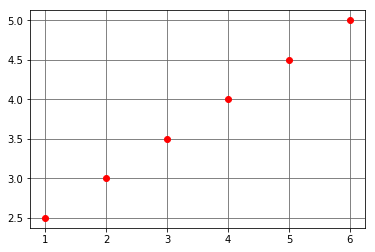

In [3]:
# Define our inputs (miles_travelled) and the corresponding output (expected_cost)
miles_travelled = np.array([ 1.0, 2.0,  3.0,  4.0,  5.0,  6.0 ], dtype=float)
expected_cost   = np.array([ 2.5, 3.0,  3.5,  4.0,  4.5,  5.0 ], dtype=float)

# Generate a graph so we can visualise the data
plotTrainingData(miles_travelled, expected_cost)


## Let's train a Simple Neural Net to predict the cost
In the following cells we will create a very simple Neural Network

### Defining a model with Keras
Throughout these workbooks we will use Keras to define our Neural Network models. In general we will use what is known as a __Sequential__ model which consists of one or more __layers__ in sequence.

The simplist type of layer in Keras is known as a __Dense Layer__ which connects every input to the layer to each of the outputs in the layer. 
- Each of these __connections__ has a __weight__ which is a numerical value (think of this as importance)
- Each Layer has a __Bias__ which adjusts each of the values calculated in the wieghts

Our data consists of 6 examples, each with a single input value and we expect a single output value - it's about as simple as it gets.

We want to develop an intution about how Neural Networks learn so we will keep our model really simple and have:
- A single Dense layer
- The Dense layer will consist of a single input unit 
- The Dense layer will produce a single output

In [4]:
# Defining the Model
model = tf.keras.Sequential()
# We have a single Dense Layer with a single unit
model.add(keras.layers.Dense(units=1, input_shape=[1]))

# Compile the model with an optimizer and loss function
model.compile(optimizer='sgd', loss='mean_squared_error')

# Produce a sumary of our model
print("\nModel Summary\n")
model.summary()

# Print the Model's current Weights and Bias values
print("\nModel Weights and Bias Terms\n")
displayModelWeightsAndBias(model)


Model Summary

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________

Model Weights and Bias Terms

Layer 0
	Weights are:  [[-0.14043462]]
	Bias is: [0.]




## How good is the model now?
Before we train the model, let's see how good it is at predicting the cost from the milages.

### Execise
Run the cell below and look at the set of Blue Cross - how good is the model currently?

In [ ]:
# Make a prediction
print("The Expected cost for a 10 mile journey is £7.00")
print ("The Predicted cost for a 10 mile journey is £%1.2f"%(model.predict([10])))

# Compare the trained model to the expected
plotTrainingVsModel(miles_travelled, expected_cost, model)   


## Let's Train the Model
When we train our model we are presenting our network with the set of examples. Typically we need to present the network with the training examples over and over again but let's see how it does when it is trained only once on the data.

We do this by using __model.fit__ and specify the inputs and expected outputs and the number of times we want to train the model on (in our case, just once)

__Note:__ We are capturing the history of model's learning for later analysis

In [ ]:
# Train the model on the data for ONE iteration (epochs=1) 
# and we provide to the model the data we want to train with (miles_travelled) 
# and the expected values for each traingin example (expected_cost)
history = model.fit(miles_travelled, expected_cost, epochs=1)

# Store the training history for later analysis
all_hist = history.history['loss']

In [ ]:
# Make a prediction
print("The Expected cost for a 10 mile journey is £7.00")
print ("The Predicted cost for a 10 mile journey is £%1.2f"%(model.predict([10])))

# Compare the trained model to the expected
plotTrainingVsModel(miles_travelled, expected_cost, model)   

## Let's train for a bit longer
Machine Learning is an interative proces, but we can see that even when we train for a single iteration (epoch) our model has improved.

So let's train our model a few more times for a total of 10 iterations.

In [ ]:
# What if we train for a total of 10 iterations
history = model.fit(miles_travelled, expected_cost, epochs=9)

all_hist = all_hist + history.history['loss']

In [ ]:
# Make a prediction
print("The Expected cost for a 10 mile journey is £7.00")
print ("The Predicted cost for a 10 mile journey is £%1.2f"%(model.predict([10])))

# Compare the trained model to the expected
plotTrainingVsModel(miles_travelled, expected_cost, model)   

## Not quite there so continue to train
Our model is improving but it's still not right so let's train for a total of 100 iterations

In [ ]:
# What if we train for a total of 100 iterations
history = model.fit(miles_travelled, expected_cost, epochs=90)
all_hist = all_hist + history.history['loss']

In [ ]:
# Make a prediction
print("The Expected cost for a 10 mile journey is £7.00")
print ("The Predicted cost for a 10 mile journey is £%1.2f"%(model.predict([10])))

# Compare the trained model to the expected
plotTrainingVsModel(miles_travelled, expected_cost, model)   

## Still needs more training
Let's train for a total of 1000 iterations

In [ ]:
# What if we train for a total of 1000 iterations
history = model.fit(miles_travelled, expected_cost, epochs=900)

all_hist = all_hist + history.history['loss']

In [ ]:
# Make a prediction
print("The Expected cost for a 10 mile journey is £7.00")
print ("The Predicted cost for a 10 mile journey is £%1.2f"%(model.predict([10])))

# Compare the trained model to the expected
plotTrainingVsModel(miles_travelled, expected_cost, model)   

In [ ]:
# How close are we to the right answer?
displayTrainingVsPredictedValues(miles_travelled, expected_cost, model)

In our original data the relationship between our input  (x) and our output (y) was $y = \frac{1}{2}x + 2$

If we look at our Weight and Bias terms we can see that they are very close to the co-efficients of this equation.

In [ ]:
# Print the Model's current Weights and Bias values
print("\nModel Weights and Bias Terms\n")
displayModelWeightsAndBias(model)

In [ ]:
plotLoss(all_hist, to_epoch=10)
plotLoss(all_hist, from_epoch=10, to_epoch=100)
plotLoss(all_hist, from_epoch=100, to_epoch=500)
plotLoss(all_hist, from_epoch=500)

## Something to think about
You have seen that Machine Learning is iterative and each iteration (epoch) tries to improve the model by a little bit until it gets good enough. 
 - Why do you think the improvements are small?
 - Why don't we make bigger adjustments to get good enough quicker?

# Key Observations
The following are key observations about Neural Networks to note before we move on
1. NNs map inputs to outputs
2. NNs __approximate__ some behaviour or relationship between inputs and outputs
3. The approximation may (and probably will) differ each time we run the model
4. Training a NN is an iterative process that attempts to minimise some error between the expected value and the predicted value.
5. Too few iterations leads to a poor approximation.
    - more iterations are generally better but after a certain point do not add value
    - to many iterations can lead to other issues (Overfitting)